In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.dates as mdates

In [3]:
import datetime
import pandas as pd
# import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# 삼성 티커 
ticker = '005930.KS'

In [5]:
# 엑셀표 확인 
ko_info = pd.read_excel('korea_index_Infomation_2014~2024_0630.xlsx')
ko_info.head()

,Date,samsung_Close,apple_Close,dollar_to_won_Close,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,apple_PER,apple_PBR,gold_Close,oil_Close
0,2014-01-01,0.0,0.000000,1054.80004,0.00000,0.00000,0.0000,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.000000
1,2014-01-02,26180.0,19.754642,1050.75000,4143.06982,1831.97998,16441.3496,1967.19,8.50,1.90,2.730754,4.262052,1225.00000,107.779998
2,2014-01-03,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999
3,2014-01-04,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999
4,2014-01-05,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999


In [6]:
samsung_Close = ko_info[['Date','samsung_Close']]
samsung_Close.head()

,Date,samsung_Close
0,2014-01-01,0.0
1,2014-01-02,26180.0
2,2014-01-03,25920.0
3,2014-01-04,25920.0
4,2014-01-05,25920.0


In [7]:
oil_Close =ko_info[['Date','oil_Close']]
oil_Close.tail()

,Date,oil_Close
3829,2024-06-26,85.250000
3830,2024-06-27,86.389999
3831,2024-06-28,86.410004
3832,2024-06-29,86.410004
3833,2024-06-30,86.410004


###  시각화 (삼전)

In [8]:
import warnings

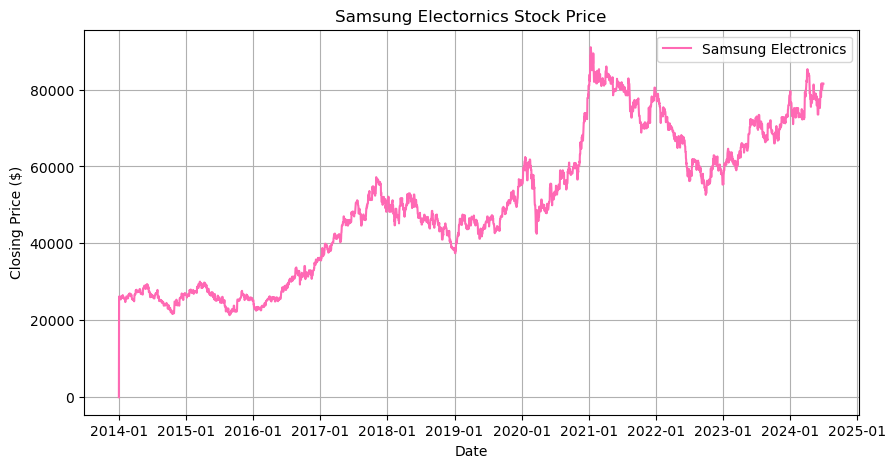

In [10]:
# 삼전 종가 
samsung_Close.loc[:,'Date'] = pd.to_datetime(samsung_Close['Date'])
# samsung_Close

plt.figure(figsize=(10,5)) # <Figure size 1000x500 with 0 Axes> 
plt.plot(samsung_Close['Date'],samsung_Close['samsung_Close'],label='Samsung Electronics',color='hotpink')
plt.title('Samsung Electornics Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)') #  삼전 주가 날짜별 종가 확인 

plt.grid(True)
plt.legend() # 범례 

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1)) # x축의 눈금을 연 단위로 설정 (1)매년 1년 간격으로 배치
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # 날짜를 연도-월 형식으로 표시

plt.show()

###  시각화 (유가)

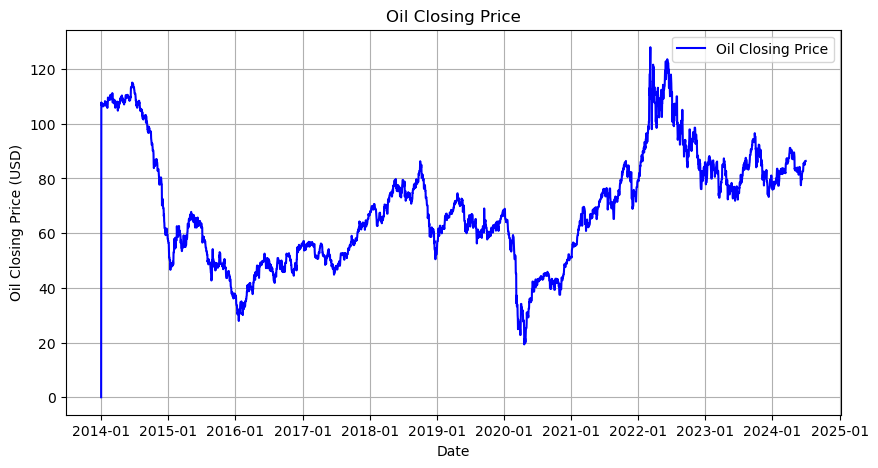

In [15]:
oil_Close.loc[:, 'Date'] = pd.to_datetime(oil_Close['Date'])
# oil_Close
# 시각화 
plt.figure(figsize=(10, 5)) #<Figure size 1000x500 with 0 Axes>
plt.plot(oil_Close['Date'], oil_Close['oil_Close'], label='Oil Closing Price', color='#0000FF')
plt.title('Oil Closing Price')
plt.xlabel('Date')
plt.ylabel('Oil Closing Price (USD)')

plt.legend() #범례 
plt.grid(True) # 그리드 


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1)) # 1년단위 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # yymm형식

### 삼전 유가 종가 비교

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mates

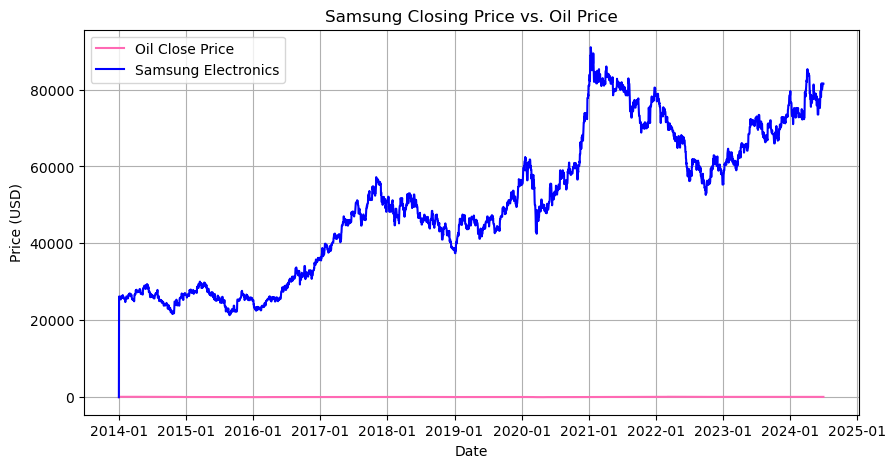

In [17]:


# Assuming oil_Close and samsung_Close are DataFrames already defined

# Convert 'Date' columns to datetime safely using .loc
oil_Close.loc[:, 'Date'] = pd.to_datetime(oil_Close['Date'])
samsung_Close.loc[:, 'Date'] = pd.to_datetime(samsung_Close['Date'])

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(oil_Close['Date'], oil_Close['oil_Close'], label='Oil Close Price', color='hotpink')
plt.plot(samsung_Close['Date'], samsung_Close['samsung_Close'], label='Samsung Electronics', color='#0000FF')

# Set titles and labels
plt.title('Samsung Closing Price vs Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Get current axis
ax = plt.gca()

# Format x-axis with year locator and date formatter
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
# 확인 코드 
print(oil_Close.head())
print(samsung_Close.head())
print(oil_Close['Date'].dtype)
print(samsung_Close['Date'].dtype)
print(oil_Close['Date'].min(), oil_Close['Date'].max())
print(samsung_Close['Date'].min(), samsung_Close['Date'].max())

### SEABON

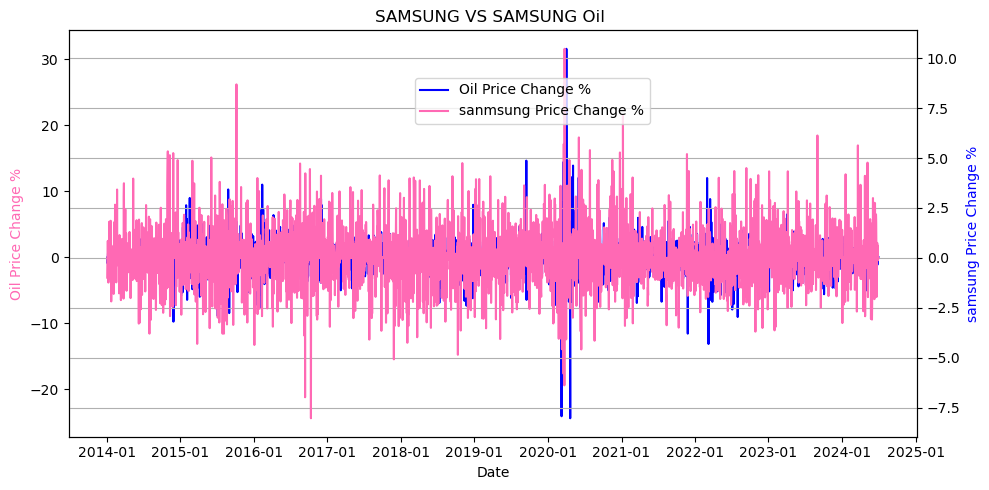

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 삼성전자 와 유가 데이터 병합

# copy 사용 이유 : 원본 보호를 위해 사용. 
# 사본 생성 후 Date 컬럼을 datetime 형식으로 변환 
oil_Close_copy = oil_Close.copy()
samsung_Close_copy = samsung_Close.copy()
# oil_Close_copy
# samsung_Close_copy
# samsung_Close
oil_Close_copy['Date'] = pd.to_datetime(oil_Close_copy['Date'])
samsung_Close_copy['Date'] = pd.to_datetime(samsung_Close_copy['Date'])

#  일일 변동률 계산 (백분율로 계산  %단위 데이터가 시간 순서대로 정렬)
oil_Close_copy['Oil Change %'] = oil_Close_copy['oil_Close'].pct_change() * 100
samsung_Close_copy['samsung Change %'] = samsung_Close_copy['samsung_Close'].pct_change() * 100

# Date를 기준으로 데이터프레임 병합
merged_df = pd.merge(oil_Close_copy[['Date', 'Oil Change %']], samsung_Close_copy[['Date', 'samsung Change %']], on='Date', how='inner')

# 변동률 (일일 퍼센트 변동) 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(merged_df['Date'], merged_df['Oil Change %'], label='Oil Price Change %', color='#0000FF')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Price Change %', color='hotpink')
ax1.tick_params(axis='y', labelcolor='black')

ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['samsung Change %'], label='sanmsung Price Change %', color='hotpink')
ax2.set_ylabel('samsung Price Change %', color='#0000FF')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('SAMSUNG VS SAMSUNG Oil ')
fig.tight_layout()
plt.grid(True)

fig.legend(loc="upper left", bbox_to_anchor=(0.4,0.9), bbox_transform=ax1.transAxes)
plt.show()

### 스케터 방식  

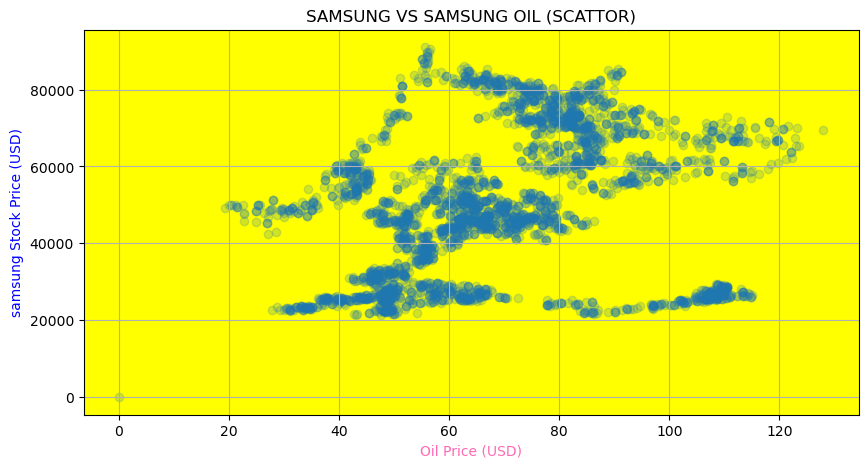

In [19]:
# 삼성전자와 유가 병함 스케터 

# 시본 생성 후 Date 컬럼을 datetime 형식으로 변환
oil_Close_copy = oil_Close.copy()
samsung_Close_copy = samsung_Close.copy()

oil_Close_copy['Date'] = pd.to_datetime(oil_Close_copy['Date'])
samsung_Close_copy['Date'] = pd.to_datetime(samsung_Close_copy['Date'])

# Date를 기준으로 데이터프레임 병합
merged_df = pd.merge(oil_Close_copy[['Date', 'oil_Close']], samsung_Close_copy[['Date', 'samsung_Close']], on='Date', how='inner')

# 산점도 그래프 
plt.figure(figsize=(10,5)) #<Figure size 1000x500 with 0 Axes>
plt.scatter(merged_df['oil_Close'], merged_df['samsung_Close'], alpha=0.2) #1에 가까우면 투명 0에 가까우면 덜 투명 
plt.title('SAMSUNG VS SAMSUNG OIL (SCATTOR)', color='black')
plt.xlabel('Oil Price (USD)', color='hotpink')
plt.ylabel('samsung Stock Price (USD)', color='#0000FF')

plt.grid(True)
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('yellow')  # 배경색
plt.show()

In [20]:
import pandas as pd 
import numpy as np

In [35]:


oil_Close_copy = oil_Close.copy()
samsung_Close_copy = samsung_Close.copy()
oil_Close_copy['Date'] = pd.to_datetime(oil_Close_copy['Date'])
samsung_Close_copy['Date'] = pd.to_datetime(samsung_Close_copy['Date'])

# 0 값을 가지는 행을 제외한 후 일일 변동률 계산
oil_Close_copy = oil_Close_copy[oil_Close_copy['oil_Close'] != 0]
samsung_Close_copy = samsung_Close_copy[samsung_Close_copy['samsung_Close'] != 0]

oil_Close_copy['Oil Change %'] = oil_Close_copy['oil_Close'].pct_change() * 100
samsung_Close_copy['samsung Change %'] = samsung_Close_copy['samsung_Close'].pct_change() * 100

# Date를 기준으로 데이터프레임 병합
merged_df = pd.merge(oil_Close_copy[['Date', 'Oil Change %']], samsung_Close_copy[['Date', 'samsung Change %']], on='Date', how='inner')

# 결측치 및 무한대 값 제거
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna()

# 데이터의 기본 통계 출력
print(merged_df.describe())

# 결측치 확인
print(merged_df.isna().sum())

# 애플 주식과 유가의 상관계수 계산
correlation = merged_df['Oil Change %'].corr(merged_df['samsung Change %'])
print(f"Correlation between Oil Price and samsung Stock Price: {correlation:.2f}")

                      Date  Oil Change %  samsung Change %
count                 3832   3832.000000       3832.000000
mean   2019-04-02 12:00:00      0.016123          0.038187
min    2014-01-03 00:00:00    -24.403597         -8.035714
25%    2016-08-17 18:00:00     -0.439543         -0.402687
50%    2019-04-02 12:00:00      0.000000          0.000000
75%    2021-11-15 06:00:00      0.589022          0.456882
max    2024-06-30 00:00:00     31.546574         10.470588
std                    NaN      2.089576          1.309863
Date                0
Oil Change %        0
samsung Change %    0
dtype: int64
Correlation between Oil Price and samsung Stock Price: 0.07
